<!--NAVIGATION-->
< | [Main Contents](https://vectorbite.github.io/VBiTraining2/) | >

# Analyses of Time Series  <span class="tocSkip">

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Vector-Abundances" data-toc-modified-id="Vector-Abundances-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Vector Abundances</a></span><ul class="toc-item"><li><span><a href="#Import-and-Map-Climate-Data" data-toc-modified-id="Import-and-Map-Climate-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import and Map Climate Data</a></span></li><li><span><a href="#Fitting-the-linear-models" data-toc-modified-id="Fitting-the-linear-models-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fitting the linear models</a></span></li><li><span><a href="#Model-Comparisons" data-toc-modified-id="Model-Comparisons-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model Comparisons</a></span></li></ul></li><li><span><a href="#Airline-passenger-data" data-toc-modified-id="Airline-passenger-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Airline passenger data</a></span><ul class="toc-item"><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Comparison</a></span></li></ul></li><li><span><a href="#Practical" data-toc-modified-id="Practical-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Practical</a></span></li></ul></div>

# Introduction

This section is focused on teaching some techniques for analysis of time series of measures of interest such as abundances. This is an important tool for quantifying and understanding fluctuations in population (e.g., of disease vectors) abundance, as well as of emergent phenomena such as disease incidence over time that are the result of multi-species dynamics. This section assumes that you have seen the [time series lecture](https://github.com/vectorbite/VBiTraining2/tree/master/lectures/TimeSeries/), where you how basic time series analyses are simply extensions to linear regression.

Also, have a look at the [`VB_TS.R`](https://github.com/vectorbite/VBiTraining2/tree/master/code) script.

# Vector Abundances

In the face of global climate change, vector borne diseases have the capacity to shift ranges and drastically alter emergence times. This can have profound public health implications. Therefore, it is essential that we monitor, and make attempts to forecast how changing climate could affect vectors. 

We will apply linear models to vector abundance data available in [VecDyn](http://www.vectorbyte.org).  

Let's start off by reading in some packages which we will use later on in the example. Let's first load packages for [data manipulation](https://nbviewer.jupyter.org/github/mhasoba/TheMulQuaBio/blob/master/notebooks/08-Data_R.ipynb). 

In [1]:
require(dplyr)
require(tidyr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr


You will get warnings becuase these backages have functions with the same name as the main ("base") R packges. 

Now let's read in some data. There are a couple of example datasets for you to explore - as well as a wealth of data you can download from the VecDyn database. They will all be in the same format, so the cleaning procedures, and the analytical processes will be the same for linear modelling. 

In [2]:
# This is a dataset from Walton County, Florida for the species Culex erraticus

Complete_data <- read.csv("../data/Culex_erraticus_walton.csv")

## Or you could use either of the following datasets for Culex nigripalpus

# Complete_data <- read.csv("../data/Culex_nigripalpus_walton.csv")
# Complete_data <- read.csv("../data/Culex_nigripalpus_manatee.csv")

Great, now we have some data. It's important that we have a look at it's layout.

In [3]:
head(Complete_data)

X,title,dataset_citation,publication_citation,description,url,contact_name,contact_affiliation,email,orcid,⋯,sample_sex,sample_stage,sample_location,sample_collection_area,sample_lat_dd,sample_long_dd,sample_environment,additional_location_info,additional_sample_info,sample_name
1622290,"Mosquito surveillance in South Walton County, Florida, USA. 2015","DOI:10.5281/zenodo.1220173,https://southwaltonmosquitocontrol.org/",NA,Mosquito surveillance from the South Walton County Mosquito Control District Vector Surveillance program to survey mosquito populations.,NA,Peter J Brabant;Peter J Brabant III,NA,NA,NA,⋯,female,adult,Walton County,NA,30.3813,-86.3593,NA,NA,NA,NA
1622343,"Mosquito surveillance in South Walton County, Florida, USA. 2015","DOI:10.5281/zenodo.1220173,https://southwaltonmosquitocontrol.org/",NA,Mosquito surveillance from the South Walton County Mosquito Control District Vector Surveillance program to survey mosquito populations.,NA,Peter J Brabant;Peter J Brabant III,NA,NA,NA,⋯,female,adult,Walton County,NA,30.3892,-86.0890,NA,NA,NA,NA
1622380,"Mosquito surveillance in South Walton County, Florida, USA. 2015","DOI:10.5281/zenodo.1220173,https://southwaltonmosquitocontrol.org/",NA,Mosquito surveillance from the South Walton County Mosquito Control District Vector Surveillance program to survey mosquito populations.,NA,Peter J Brabant;Peter J Brabant III,NA,NA,NA,⋯,female,adult,Walton County,NA,30.3469,-86.0694,NA,NA,NA,NA
1622410,"Mosquito surveillance in South Walton County, Florida, USA. 2015","DOI:10.5281/zenodo.1220173,https://southwaltonmosquitocontrol.org/",NA,Mosquito surveillance from the South Walton County Mosquito Control District Vector Surveillance program to survey mosquito populations.,NA,Peter J Brabant;Peter J Brabant III,NA,NA,NA,⋯,female,adult,Walton County,NA,30.3717,-86.2655,NA,NA,NA,NA
1622440,"Mosquito surveillance in South Walton County, Florida, USA. 2015","DOI:10.5281/zenodo.1220173,https://southwaltonmosquitocontrol.org/",NA,Mosquito surveillance from the South Walton County Mosquito Control District Vector Surveillance program to survey mosquito populations.,NA,Peter J Brabant;Peter J Brabant III,NA,NA,NA,⋯,female,adult,Walton County,NA,30.3650,-86.2261,NA,NA,NA,NA
1622479,"Mosquito surveillance in South Walton County, Florida, USA. 2015","DOI:10.5281/zenodo.1220173,https://southwaltonmosquitocontrol.org/",NA,Mosquito surveillance from the South Walton County Mosquito Control District Vector Surveillance program to survey mosquito populations.,NA,Peter J Brabant;Peter J Brabant III,NA,NA,NA,⋯,female,adult,Walton County,NA,30.3813,-86.3593,NA,NA,NA,NA


There's a lot of information in this dataset, most of which we won't be using to analyse the time series data. For simplicity, let's clean the data and store it in another data frame which we can use to map climate data to. 

In [4]:
# select only the rows of interest 
Main_data <- select(Complete_data, c("sample_end_date", "sample_value", "sample_lat_dd", "sample_long_dd"))

# Make sure the sample end date is in date format
Main_data$sample_end_date <- as.Date(Main_data$sample_end_date, format = "%Y-%m-%d")

# Order by date 
Main_data <- Main_data[order(Main_data$sample_end_date, decreasing=FALSE),]

# We can now create columns for Month/Year and Month 
Main_data$Month_Yr <- format(as.Date(Main_data$sample_end_date), "%Y-%m")
Main_data$Month <- format(as.Date(Main_data$sample_end_date), "%m")

# Many sample values are returned with zeros which will cause problems once we log the abundance data 
# So, we can transform this data by scaling up by 0.00001 
Main_data$sample_value <- Main_data$sample_value + 0.00001

# Remove all zeros (on the slight off chance there are some)
Main_data<-subset(Main_data, Main_data$sample_value>0)

# create a log column - we could also use a log(x+1) transform rather than + 0.00001
Main_data$log_sample <- log(Main_data$sample_value)

# Pre-allocate the rows for climate data by filling with NAs
Main_data$Max.Temp <- NA
Main_data$Precipitation <- NA

## Import and Map Climate Data 


Next, we can import the climate data to be matched up to the abundance data we have stored as ```Main_data```. For this, you will need to ensure you have the climate data file `vectorbase_locations_dates_climate.csv` (look in the data directory on the [github repo](https://github.com/vectorbite/VBiTraining2)) saved in your data directory. 

This climate data has been downloaded in advance from NOAA databases, on a scale of 2.5x2.5 degrees lat/long, on a daily basis. 

In [5]:
# Read in the climate data csv 

Climate_data <- read.csv("../data/vectorbase_locations_dates_climate.csv")

We can now populate these columns by matching up the date for each row, and the closest co-ordinates we have in our climate data. 


In [6]:
# For each row in Main_data
for (row in 1:nrow(Main_data)){

  # extract the date associated with the row 
  date <- as.character(Main_data[row, "sample_end_date"])
  
  # subset the climate data to only those with the same date
  data <- subset(Climate_data, Climate_data$Collection.date.range == date)
  
  if (nrow(data)>0){
  
    # define the lat and long desired
    lat <- as.numeric(Main_data[row, "sample_lat_dd"])
    long <- as.numeric(Main_data[row, "sample_long_dd"])
    
    # find the absolute differences between desired lat/longs to the climate datasets
    x <- abs(data$Initial_latitude - lat)
    y <- abs(data$Initial_longitude - long)
    
    # find the index for which there is the minimum overall difference between lat/longs 
    z<-which(x+y==min(x+y))
    
    # draw out the max temp and place into main data frame 
    Main_data[row, "Max.Temp"] <- data[z, "Max.Temp"]
    Main_data[row, "Precipitation"] <- data[z, "Precipitation"]
    
  }
  
  else{
  
    # If there aren't any data to extract for a given date, input NAs
    Main_data[row, "Max.Temp"] <- NA
    Main_data[row, "Precipitation"] <- NA
  } 
}

Now let's check whether this has worked correctly, and assess whether there are any ```NA```'s. 

In [7]:
summary(Main_data$Max.Temp)
summary(Main_data$Precipitation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.656  23.902  27.844  26.895  31.091  35.782 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00000   0.00000   0.02836   5.73650   4.60330 121.88240 

When considering time series data, the temporal resolution can have profound implications. Ideally, we want no gaps in our data - therefore working with data on the daily scale for abundance data is impossible without some sort of interpolation to fill the gaps. Instead, lets aggregate the data to the monthly scale by averaging the daily data. 

In [8]:
Aggregated_data <- aggregate(cbind(sample_value, Max.Temp, Precipitation, log_sample) ~ Month_Yr, data = Main_data, mean)
print(Aggregated_data)

   Month_Yr sample_value Max.Temp Precipitation log_sample
1   2015-01  0.000010000 17.74602   3.303991888 -11.512925
2   2015-02  0.018191818 17.87269  16.544265802 -11.303599
3   2015-03  0.468095106 23.81767   2.405651215  -9.735164
4   2015-04  1.619057619 26.03559   8.974406168  -7.671132
5   2015-05  0.821438571 30.01602   0.567960943  -8.722485
6   2015-06  3.005962381 31.12094   4.841342729  -4.914463
7   2015-07  2.380962381 32.81130   3.849010353  -7.056628
8   2015-08  1.826357305 32.56245   5.562845324  -6.782594
9   2015-09  0.648819524 30.55155  10.409724627  -8.453458
10  2015-10  0.988033952 27.22605   0.337750269  -8.499736
11  2015-11  0.737814878 24.86768  18.306749680 -10.077454
12  2015-12  0.142867143 22.46588   5.621475377 -11.207513
13  2016-01  0.000010000 16.02406   3.550622029 -11.512925
14  2016-02  0.020212020 19.42057  11.254680803 -11.334986
15  2016-03  0.015161515 23.13610   4.785664728 -11.338487
16  2016-04  0.026153791 24.98082   4.580424519 -11.3552

Now that we have a clean dataframe to work with, let's plot our abundance data. 

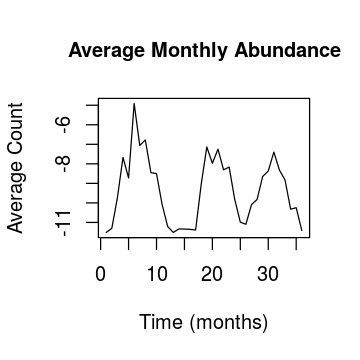

In [42]:
options(repr.plot.width=3, repr.plot.height=3)
plot(Aggregated_data$log_sample, type = "l", main="Average Monthly Abundance", xlab ="Time (months)", ylab = "Average Count", cex.lab = 1,cex.main =1)

## Fitting the linear models 

Let's first create a dataframe containing covariates. We include size and cosine waves with a 12 month period to capture the pattern of seasonality apparent in these data.

In [43]:
t <- 2:nrow(Aggregated_data)
TS_df <- data.frame(Specimens=Aggregated_data$log_sample[2:nrow(Aggregated_data)],
                        SpecimensPast=Aggregated_data$log_sample[1:nrow(Aggregated_data)-1],
                        t=t,
                        Month=Aggregated_data$Month[2:nrow(Aggregated_data)],
                        Max.Temp=Aggregated_data$Max.Temp[2:nrow(Aggregated_data)],
                        Precipitation=Aggregated_data$Precipitation[2:nrow(Aggregated_data)],
                        sin12=sin(2*pi*t/12), cos12=cos(2*pi*t/12))

Here we will conduct and plot a number of linear regression models for our data we will progressively add components to see which best predicts the data given. 


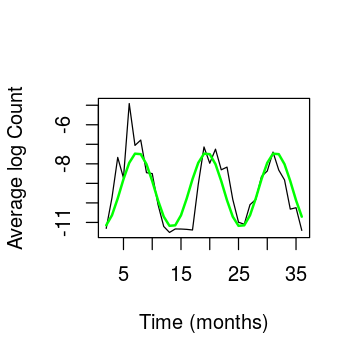

In [46]:
# plot the log sample 
par(mfrow=c(1,1))
plot(t, TS_df$Specimens, type="l", xlab = "Time (months)", ylab = "Average log Count")

# create a vector to store the adjusted R squared for each model 
adj.R2 <- vector()

# first we will look at how the previous time step and the time itself can predict

TS_lm_sin_cos <- lm(Specimens ~ sin12 + cos12, data = TS_df)

# add a line to the plot for this particular model 
lines(t, TS_lm_sin_cos$fitted, col="green", lwd=2, cex.lab =1)

# we will store the R2 for later, so that we can make direct comparisons 
adj.R2 <- c(adj.R2, summary(TS_lm_sin_cos)$adj.r.squared)

It looks like the sine and cosine waves can predict the peaks relatively well! 

Are the data autocorrelated? That is, do the abundances correlate with themselves with a lag time? We can check using the ```acf()``` function in R:

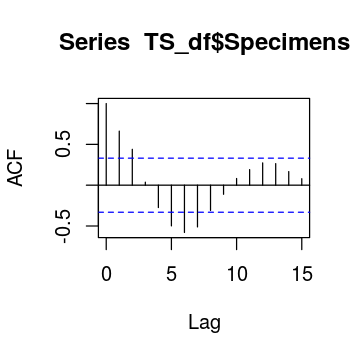

In [48]:
acf(TS_df$Specimens, cex.lab = 1)

The ```acf()``` function automatically includes a 0 time lag which will always have a value of 1 (every measure is perfectly correlated with itself!), thus acting as a reference point. We can see that a time lag of 1 (month) has the highest correlation, so it should be interesting to incorporate this into a linear model. 

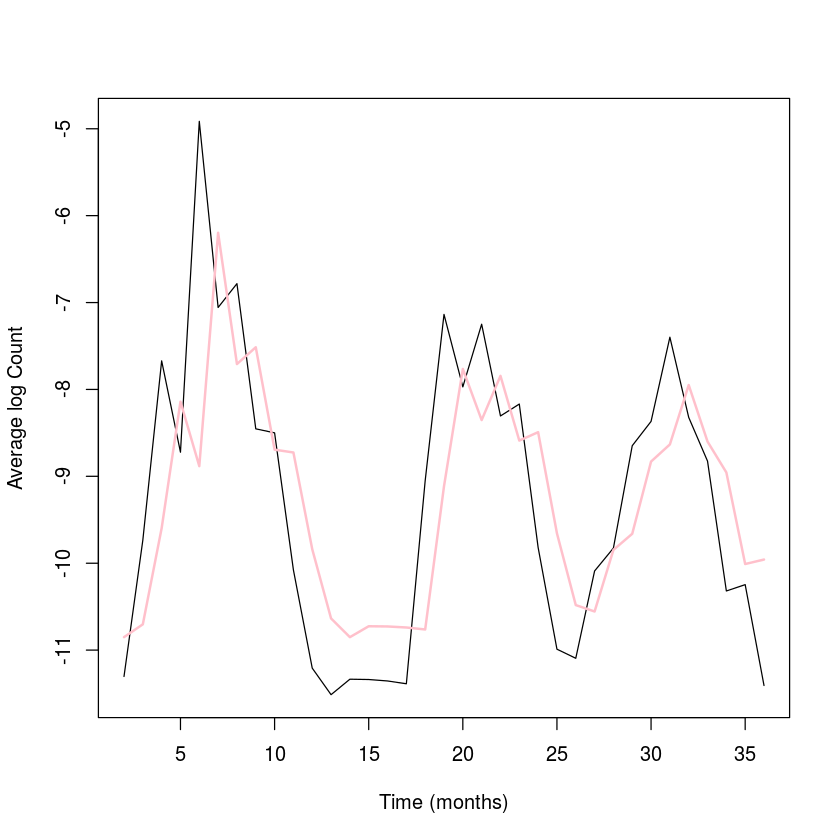

In [13]:
TS_lm <- lm(Specimens ~ SpecimensPast, data = TS_df)
#summary(TS_lm)
plot(t, TS_df$Specimens, type="l", xlab = "Time (months)", ylab = "Average log Count")
lines(t, TS_lm$fitted, col="pink", lwd=2)
adj.R2 <- c(adj.R2, summary(TS_lm)$adj.r.squared)

Next, we can create a model to incorporate climatic factors individually into our models. First visually examine the times series of temperature and precipitation:

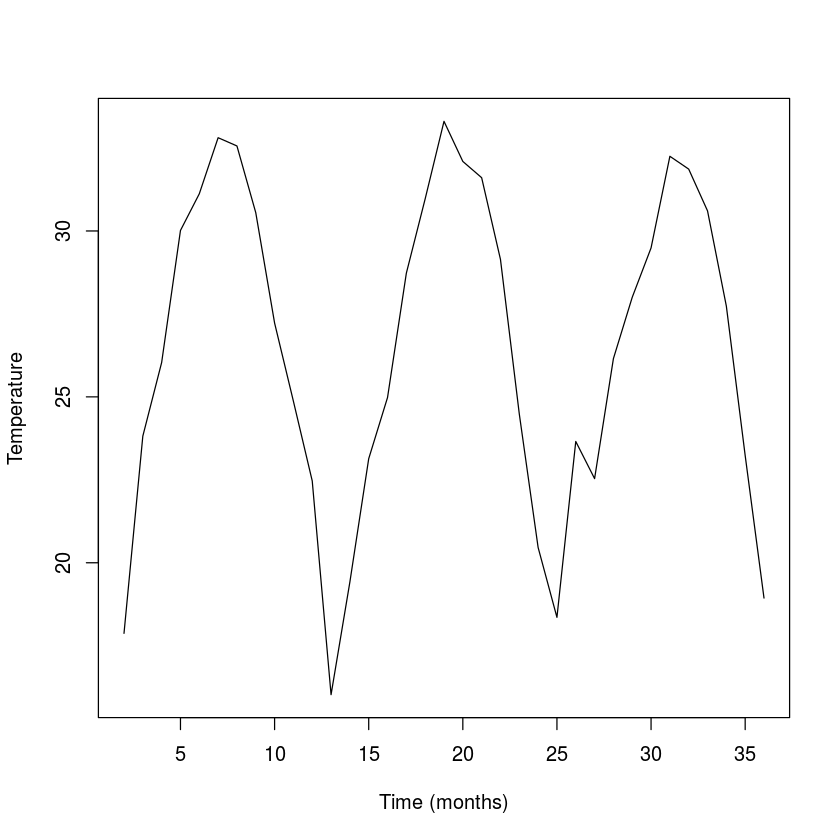

In [14]:
plot(t, TS_df$Max.Temp, type="l", xlab = "Time (months)", ylab = "Temperature")

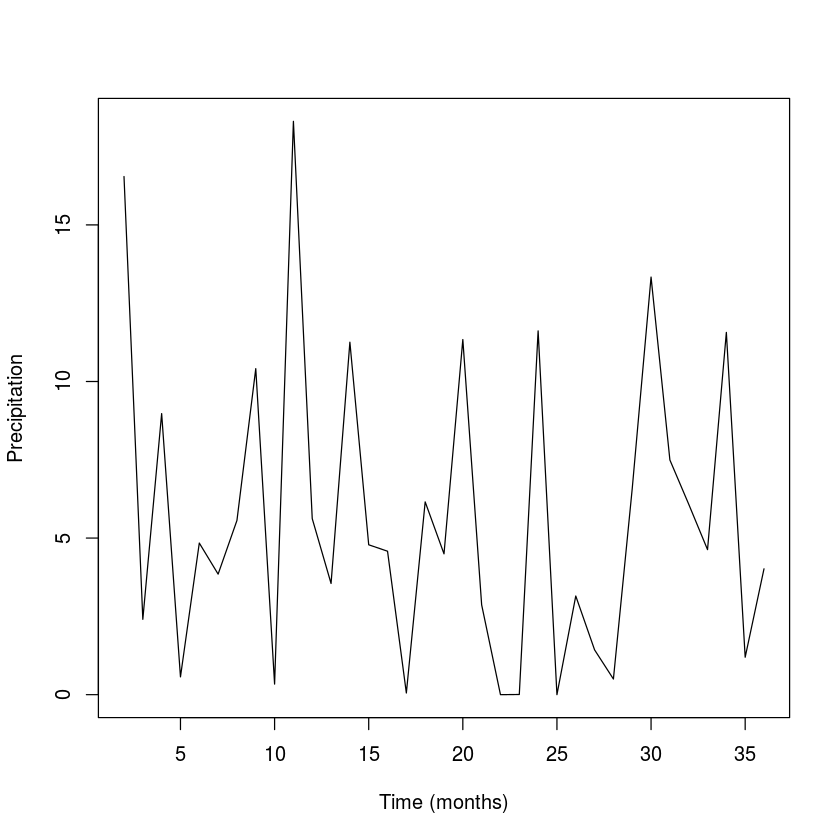

In [15]:
plot(t, TS_df$Precipitation, type="l", xlab = "Time (months)", ylab = "Precipitation")

Clearly temperature looks more promising as a correlate, but let's fit linear models with each of these variables anyway:  

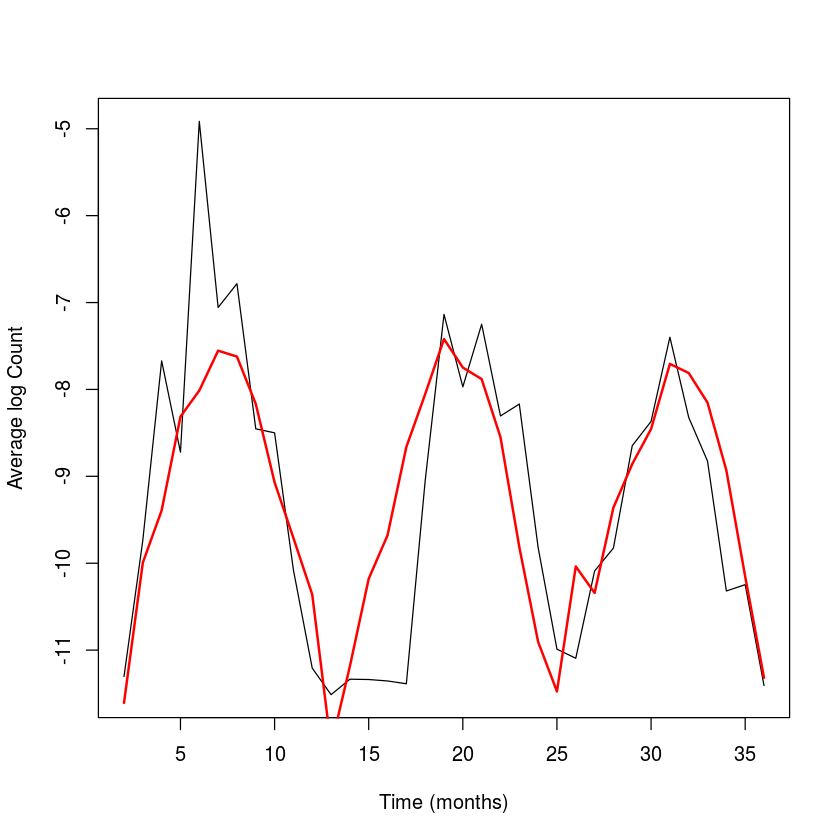

In [16]:
TS_lm_temp <- lm(Specimens ~ Max.Temp, data = TS_df)
#summary(TS_lm_temp)
plot(t, TS_df$Specimens, type="l", xlab = "Time (months)", ylab = "Average log Count")
lines(t, TS_lm_temp$fitted, col="red", lwd=2)
adj.R2 <- c(adj.R2, summary(TS_lm_temp)$adj.r.squared)

And precipitation:

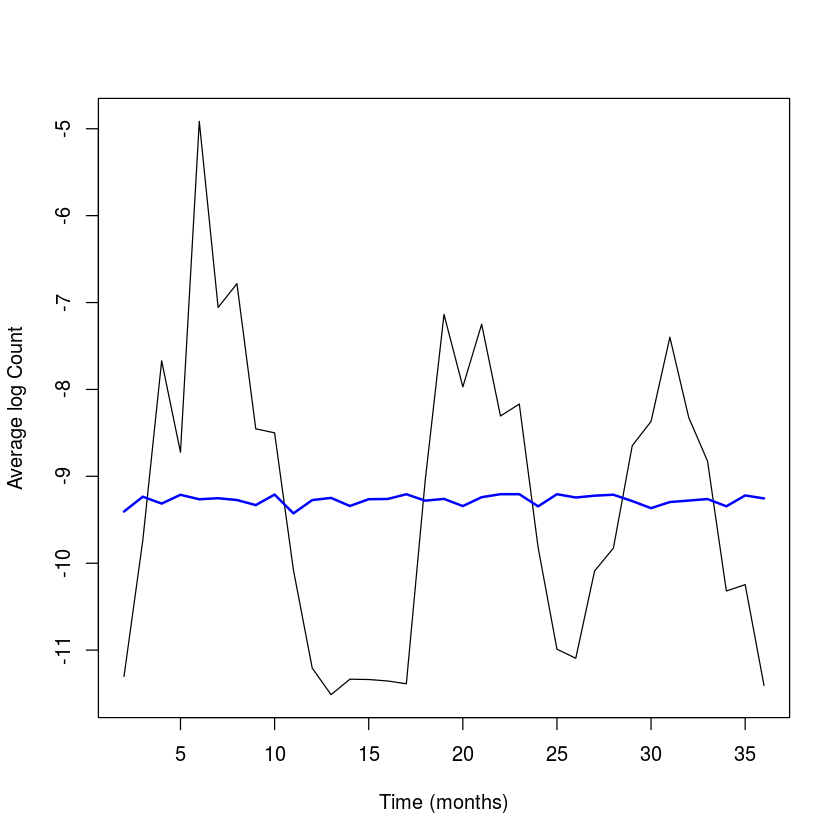

In [17]:
TS_lm_precip <- lm(Specimens ~ Precipitation, data = TS_df)
#summary(TS_lm_precip)
plot(t, TS_df$Specimens, type="l", xlab = "Time (months)", ylab = "Average log Count")
lines(t, TS_lm_precip$fitted, col="blue", lwd=2)
adj.R2 <- c(adj.R2, summary(TS_lm_precip)$adj.r.squared)

Unlike temperature, preciptation by itself isclearly not a very good predictor, as we suspected. Finally, let's incorporate all of the factors into one model.

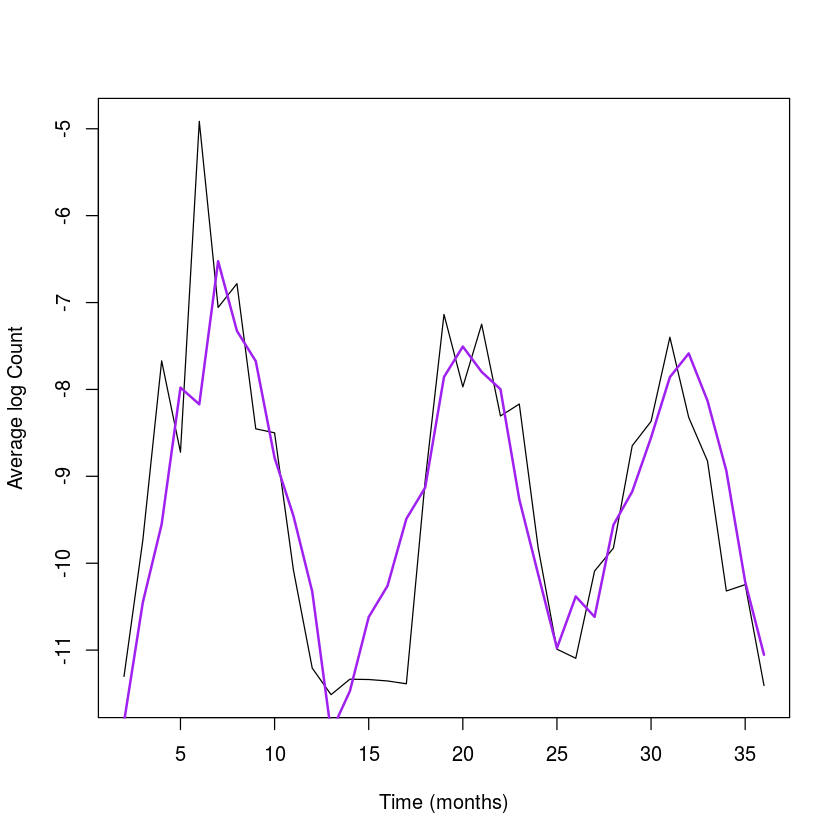

In [18]:
TS_lm_all <- lm(Specimens ~ SpecimensPast + Max.Temp + Precipitation, data = TS_df)
#summary(TS_lm_all)
plot(t, TS_df$Specimens, type="l", xlab = "Time (months)", ylab = "Average log Count")
lines(t, TS_lm_all$fitted, col="purple", lwd=2)
adj.R2 <- c(adj.R2, summary(TS_lm_all)$adj.r.squared)

All of the models appear, visually, to predict our data relatively well except precipitation. We can compare our models by looking at the $R^2$ value adjusted for the number of free parameters included. Remember that the $R^2$ value shows us the proportion of our data that can be explained by our model. 

In [19]:
# now let's have a look at how each model performed comparitively 
print(adj.R2)

[1]  0.60466498  0.48464800  0.61071860 -0.02908796  0.66016006


In [20]:
summary(TS_lm_all)


Call:
lm(formula = Specimens ~ SpecimensPast + Max.Temp + Precipitation, 
    data = TS_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8983 -0.7027 -0.0130  0.5266  3.2569 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -11.16975    2.24492  -4.976  2.3e-05 ***
SpecimensPast   0.34355    0.13175   2.608 0.013901 *  
Max.Temp        0.19430    0.04536   4.283 0.000165 ***
Precipitation  -0.01071    0.03541  -0.303 0.764236    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9889 on 31 degrees of freedom
Multiple R-squared:  0.6901,	Adjusted R-squared:  0.6602 
F-statistic: 23.02 on 3 and 31 DF,  p-value: 4.967e-08


Clearly, max temperature and abundance autocorrelation with time lag of 1 together explain most of the variation in the data. 

## Model Comparisons 

Now that we have our models, we can make comparisons between them using a partial F test and/or BIC (Bayesian Information Criterion) analysis.

We have had a look at our $R^2$ values, but we should also look to compare them using a partial F-test. This can be applied to models that are nested - for instance the temperature model and the complete model. 

In [21]:
anova(TS_lm_temp, TS_lm_all)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
33,36.96753,NA,NA,NA,NA
31,30.31649,2,6.651037,3.400495,0.04621756


Now consider using BIC analysis. Generally, the lowest BIC value is the preferred model. A difference of greater than 2 shows evidence against the higher scored model, whilst a difference of greater than 10 showing strong evidence. 

You may choose to compare any of the models. Let's compare the sin/cos model with the complete (all) model as an example. 

In [22]:
# define the length of the series 
n<-length(TS_df$Specimens)-1

# extract the BIC scores 
bics<-c(TS_mod_sin_cos=extractAIC(TS_lm_sin_cos, k=log(n))[2],TS_mod_all=extractAIC(TS_lm_all, k=log(n))[2])

# subtract the bic scores 
as.numeric(bics[1]) - as.numeric(bics[2])

[1] 2.878902

For this example using Culex erraticus from Walton County, we can see that there is positive evidence for the complete model incorporating Precipitation, Maximum Temperature and past abundance counts, with a BIC score that is 2.88 lower than the sin/cos model. In other words, it is resonable for us to infer that temperature is the main reason why why observe cycles in abundance, but with a time lag built into the response. 

# Airline passenger data

Now let's perform a time series analysis of some data on airline passenger numbers. 

The data you will analyze consist of monthly numbers of international airline passengers from 1949 to 1961. These data can be found in the [`airline.csv`](https://github.com/vectorbite/VBiTraining/raw/master/data/airline.csv) file. 

In [23]:
airline <- read.csv("../data/airline.csv")

First plot the data:

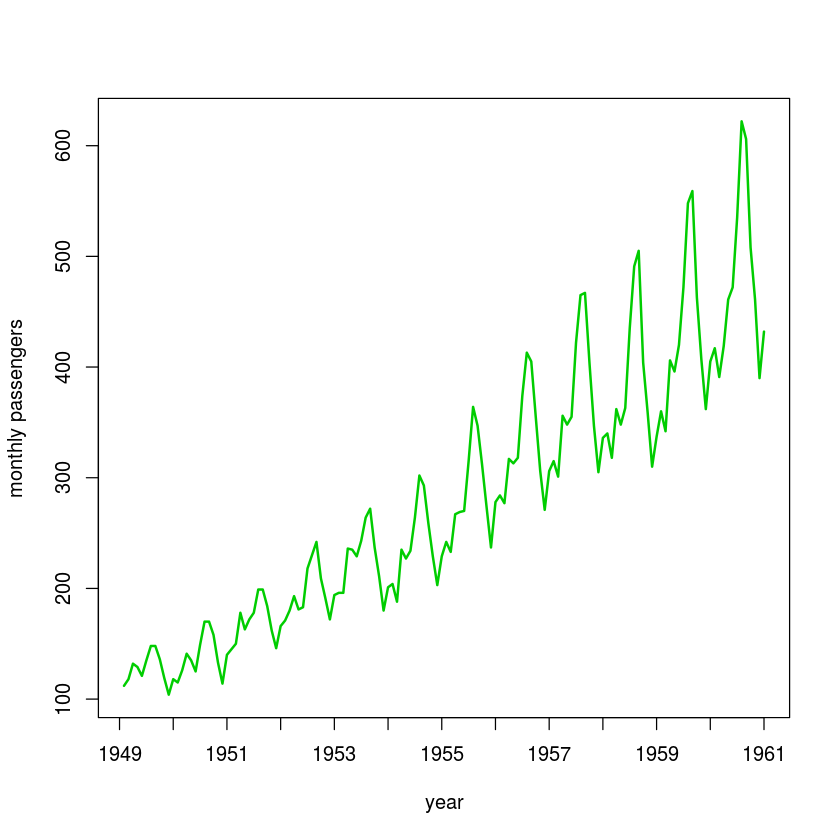

In [24]:
plot(airline$Passengers, xlab="year", ylab="monthly passengers", type="l", col=3, lwd=2, xaxt="n")
axis(1, at=(0:12)*12, labels=1949:1961)

Notice that this involves a somewhat different approach toward adding axis labels than usual. *What does `at="n"` mean? What does the axis function do?* (Check the help doc: `?axis`)

Next, we use the `acf` function to plot the auto-correlation function of the passengers data:

In [25]:
## put the acf function here


*From the two plots above, what things do you notice about the data? What transforms might you need to take of the data? What kinds of covariates might you need to add in?*

Re-plot the from data above using a log transform of the response (passenger):

In [26]:
## plot code here

Now it's time to build a data frame to hold the data. This is a good habit to get in to when you are building models for data that include transforms and possibly multiple lags, etc. 

First we make a time covariate:

In [27]:
t <- 2:nrow(airline)

Now, into the data frame, add the following covariates:

1. logY: log of the number of passengers 
2. logYpast: this is your auto-regressive term, the log of the passengers from the previous month
3. t: month number
4. sin12: sine terms with period of 12 months
5. cos12: cosine term with period of 12 months

In [28]:
YX <- data.frame(logY=log(airline$Passengers[2:144]), 
                 logYpast=log(airline$Passengers[1:143]), t=t,
                 sin12=sin(2*pi*t/12), cos12=cos(2*pi*t/12))

In [29]:
## your fitted model and the summary go here

Fit a linear model with logY as the response and the other 4 components as predictors. Look at the summary of the fit.


*Are all of the predictors significant? What is the $R^2$ of your regression?*

Next, we want to plot the data along with the prediction (aka the fit). I've plotted the data on a log scale (drawn with a dotted line).  Use the "lines" function to overlay the FITTED values from your regression (e.g., if your regression model was called "reg" you want to plot reg$fitted vs t) as a solid line in another color. This solid line is your prediction. Update the legend to reflect your additional line.

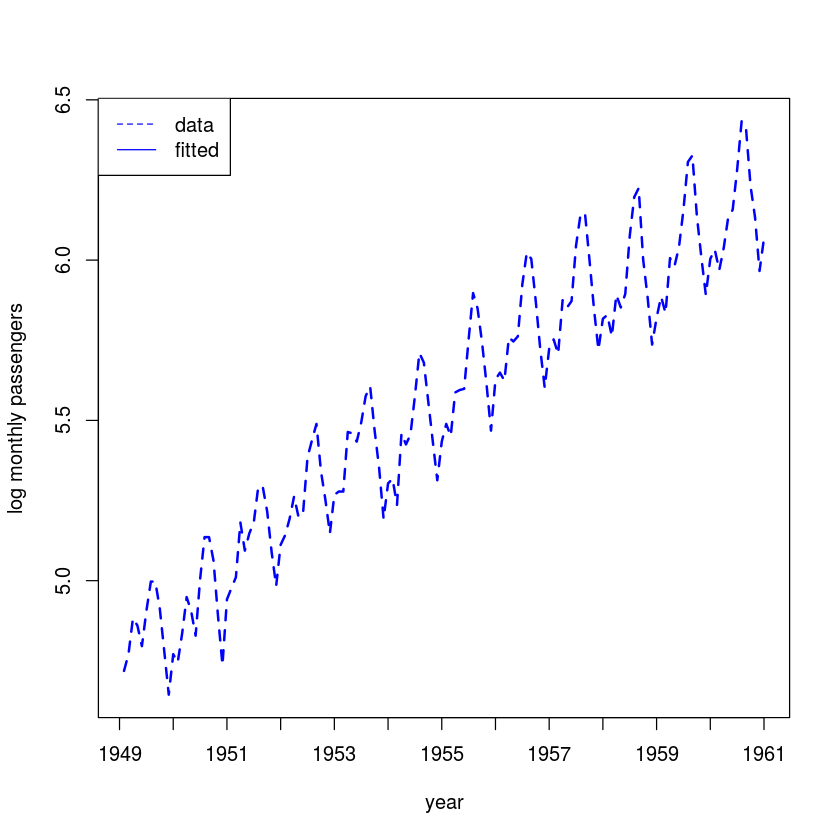

In [30]:
plot(log(airline$Passengers), xlab="year",
     ylab="log monthly passengers", type="l", col=4, lty=2,
     xaxt="n", lwd=2)
axis(1, at=(0:12)*12, labels=1949:1961)

## add in the line here

legend("topleft", legend=c("data", "fitted"), lty=c(2,1), col=c(4,4)) ## update the legend


The difference between the solid and dotted lines at each month are your residuals across time. As always, we want to also look at our residuals explicitly to see if we're doing a good job of explaining things. For TS we primarily look at residuals across time, and the ACF of our residuals. So make those two plots here. 

In [31]:
par(mfrow=c(1,2))

## residuals plotted across time

## acf plot of the residuals

*How do these look? What do you notice about the residuals, esp the ACF?*

It turns out that there is a month effect that we're missing. Here is one way to look at it (note we have to index by t so that everything lines up properly):

In [32]:
## this command assumes that your fitted model is called mod1. You'll need to change it to your object

## boxplot(mod1$resid ~ airline$Month[t], xlab="month",
##        ylab="residuals", col=7)

Residuals in months with lots of school holidays (March, summer, December) are consistantly high. Let's create a dummy variable called "holidays" that tells whether a particular passenger record is for a month that has lots of holidays.

In [33]:
YX$holidays <- airline$Month[t] %in% c(3,6,7,8,12)

Fit a new lm that adds this holiday variable on to what you had before, and then re-examine the residuals, including by month.

In [34]:
## new fitted model and summary here

## plot of data + model fit here
par(mfrow=c(1,2))
## residuals plotted across time

## acf plot of the residuals

## boxplot of residuals by month


## Model Comparison

Now you have 2 nested models. Because they are nested, we can compare them in two ways. First I do a partial F-test. The idea behind the F-test is that it looks at the difference in the $R^2$ value between the two models and determines whether or not this difference is large enough to warrent the additional covariates. If we use the "anova" function in R and provide both fittend model objects as arguments, it will automatically perform a partial F-test. Note: you will need to replace mod1 and mod2 with the names of your model objects.

In [35]:
## partial F test: anova(mod1, mod2)

*Based on these what model would you choose and why?*

We can also compare the models via BIC (the Bayesian Information Criterion) and the approximate relative model probabilities based on the BICs. Note that we can use BIC/model probabilities to compare between models even if the models are not nested, as long as the response being modeled is the same in each case. Note: you will need to replace mod1 and mod2 with the names of your model objects.

In [36]:
n<-length(YX$logY)-1
##bics<-c(mod1=extractAIC(mod1, k=log(n))[2],
##        mod2=extractAIC(mod2, k=log(n))[2])

##ebics<-exp(-0.5*(bics-min(bics)))

##probs<-ebics/sum(ebics)


##rbind(round(bics, 5), round(probs, 5))

*Which model is the best via BIC? Does this jive with what the partial F-test told you? What is the $R^2$ for your best model. Based on this model selection, $R^2$ and what you saw in the residuals for this model, do you feel satisfied that your model is capturing the patterns in the data? Would you want to go back and fit anything else?*

# Practical

Use *Aedes aegypti* abundances from light traps from various locations in Manatee County, Florida to perform a Time series analysis. This dataset can be downloaded from [VecDyn](http://vectorbyte.org/). You will need to register first. The same dataset is also available on the workshop [git repository](https://github.com/vectorbite/VBiTraining2) (file called [`vecdyn_manatee_county_a.aegypti.csv`](https://github.com/vectorbite/VBiTraining2/raw/master/data/vecdyn_manatee_county_a.aegypti.csv)). 

Write it as an independent, self-sufficient R script that produces all the plots in a reproducible workflow when sourced. 